# FINAL PROJECT - TRACK THE BICYCLE

The detection is out of the scope of the project, consider that for the following series of images, the bounding box are already calculated and returned in a file.

You will track the bicycle using the measurements of the center of the detected Bounding Box.
Here are the files that might help you:


*   *VIRAT_S_010204_09_001285_001336.mp4* is the original image from the [VIRAT Video Dataset](https://viratdata.org)

![alt text](https://raw.githubusercontent.com/Jeremy26/kalman_filters_course/master/images/screen_scene.png)

*   *detect.mp4* is the same video, where we run a YOLOv3 object detector.

![alt text](https://raw.githubusercontent.com/Jeremy26/kalman_filters_course/master/images/screen_detector.png)

*   *track.mp4* will be your output with active tracking

![alt text](https://raw.githubusercontent.com/Jeremy26/kalman_filters_course/master/images/screen_active_tracker.png)

**About the dataset**
A Large-scale Benchmark Dataset for Event Recognition in Surveillance Video" by Sangmin Oh, Anthony Hoogs, Amitha Perera, Naresh Cuntoor, Chia-Chih Chen, Jong Taek Lee, Saurajit Mukherjee, J.K. Aggarwal, Hyungtae Lee, Larry Davis, Eran Swears, Xiaoyang Wang, Qiang Ji, Kishore Reddy, Mubarak Shah, Carl Vondrick, Hamed Pirsiavash, Deva Ramanan, Jenny Yuen, Antonio Torralba, Bi Song, Anesco Fong, Amit Roy-Chowdhury, and Mita Desai, in Proceedings of IEEE Comptuer Vision and Pattern Recognition (CVPR), 2011.
[Access Link](https://viratdata.org).

**About the project** <p>
You are given an image detection algorithm that isn't ideal. Sometimes, the algorithm fails and misses the target. These happen during occlusion or failures from the algorithm for various reasons.
Using a Kalman Filter is an effective way to keep track of the data; and that's exactly what we'll do!

**The goal of the project will be to use a Kalman Filter to continue tracking the pedestrian even when the detector fails. You'll have to include the detector's measurements to improve the filter and help it converge.**


## Colab Link & Imports

In [3]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

os.chdir("/content/drive/My Drive/think_autonomous/kalman_filters_course")
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Designing a Kalman Filter.ipynb'	    images
'Designing a Kalman Filter Starter.ipynb'   Probabilities.ipynb
 Final_Project.ipynb			    README.md
 Final_Project_Starter.ipynb		    yolo_for_tracking_2.py


In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import copy
import pickle
import numpy as np
import time
import cv2

# Step 1 - The System
You are given a video that will be processed frame by frame. <p>

*   Sometimes, the algorithm processing the frame will return **an (X,Y) coordinate** indicating where the bicycle is supposed to be as well as a timestamp.
*   Sometimes, it won't and will return **"Not detected"**, which we know to be wrong.


In [56]:
## CODE TO DETECT OBSTACLES -- NOT NEEDED
from yolo_for_tracking_2 import *

detector = YOLO()
BICYCLE_MEASUREMENTS = []
TIMESTAMPS = []

def detection(image):
    # Run an inference using YOLOv3
    result_img, result_boxes = detector.inference(image)
    # Store the timestamp
    TIMESTAMPS.append(time.time())
    # If there is a bounding box, add the center
    if len(result_boxes) >0:
        BICYCLE_MEASUREMENTS.append([result_boxes[0][0]+ result_boxes[0][2]/2, result_boxes[0][1]+ result_boxes[0][3]/2])
    # Else, add "Not detected"
    else:
        BICYCLE_MEASUREMENTS.append("Not detected")
    return result_img

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: ignored

In [11]:
from moviepy.editor import VideoFileClip
video_file = "/content/drive/My Drive/think_autonomous/kalman_filters_course/images/VIRAT_S_010204_09_001285_001336.mp4"
clip = VideoFileClip(video_file).subclip(15,25)
white_clip = clip.fl_image(detection)
%time white_clip.write_videofile("/content/drive/My Drive/think_autonomous/kalman_filters_course/images/detect.mp4",audio=False)

NameError: ignored

In [12]:
BICYCLE_MEASUREMENTS = [[264.0, 320.5], 'Not detected', [276.5, 324.0], [278.0, 323.5], [281.0, 322.5], [284.5, 323.5], [285.0, 324.0], [287.5, 324.0], [299.5, 326.5], [303.0, 327.0], [305.0, 326.5], [307.0, 327.0], [310.5, 326.5], [313.5, 323.5], [325.0, 323.5], [324.0, 326.5], [327.0, 327.0], [332.5, 327.0], [337.5, 323.5], [341.0, 324.0], [349.5, 325.5], [351.5, 325.5], [353.5, 325.0], [356.0, 325.0], [359.0, 325.0], [363.0, 325.0], [365.0, 322.5], [366.0, 322.5], [365.5, 322.0], [373.0, 325.5], [374.0, 325.0], [378.0, 324.5], [380.5, 323.5], [382.0, 323.5], [383.0, 324.0], [384.0, 323.0], [387.0, 322.0], [389.5, 322.0], [390.0, 321.5], [395.0, 324.0], [396.0, 322.5], [397.5, 323.5], [398.5, 323.0], [402.0, 322.5], [407.0, 336.0], [407.5, 335.5], [412.0, 336.0], [413.0, 336.5], [412.0, 339.5], [420.5, 337.0], [421.5, 336.0], [422.0, 336.0], [424.0, 336.0], [428.5, 336.5], [430.0, 337.0], [434.0, 337.5], [434.5, 337.0], [437.5, 336.5], [438.5, 336.0], 'Not detected', 'Not detected', [451.5, 336.5], [454.0, 336.5], 'Not detected', 'Not detected', [460.0, 336.5], 'Not detected', [462.5, 336.0], 'Not detected', 'Not detected', [473.0, 336.0], 'Not detected', 'Not detected', 'Not detected', [483.0, 335.5], 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', [527.5, 351.0], 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', [596.0, 381.0], [597.0, 365.0], [600.0, 380.0], [605.0, 380.0], [607.0, 381.0], [608.0, 381.0], [612.0, 380.0], [612.0, 380.0], [619.0, 383.0], [620.0, 382.5], [624.0, 392.0], [625.5, 392.0], [628.0, 380.5], [630.0, 393.5], [633.0, 393.0], [635.0, 394.0], [637.0, 394.0], [637.0, 395.0], [644.0, 397.0], [644.0, 397.0], [646.0, 395.5], [647.5, 394.5], [651.5, 393.5], 'Not detected', [655.0, 407.0], [656.0, 391.0], 'Not detected', 'Not detected', 'Not detected', 'Not detected', [669.0, 410.0], [669.0, 410.0], [673.0, 419.5], [675.0, 422.5], [679.5, 422.5], [680.5, 424.5], [683.0, 424.5], [685.0, 426.0], [686.0, 432.0], [695.0, 433.5], [694.5, 434.5], [696.5, 437.0], [700.0, 421.5], [700.0, 421.5], [705.0, 421.5], [708.0, 423.0], [709.0, 424.5], [712.5, 427.0], [715.0, 426.5], [716.0, 429.5], [718.5, 431.5], [722.0, 434.0], [724.5, 433.5], [725.0, 434.5], 'Not detected', 'Not detected', 'Not detected', [744.0, 466.0], [745.5, 453.0], [747.5, 455.0], [749.5, 453.5], [752.0, 455.0], [750.5, 457.0], 'Not detected', 'Not detected', 'Not detected', [761.0, 475.5], [761.0, 475.5], [762.5, 475.5], [764.0, 478.0], 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', [805.5, 537.0], [809.5, 536.5], [811.0, 536.5], [815.0, 538.0], 'Not detected', 'Not detected', [825.5, 563.0], 'Not detected', [842.5, 567.0], [844.5, 571.0], [845.5, 588.5], [852.0, 589.5], [857.0, 591.5], [864.0, 621.0], [868.0, 622.0], [874.0, 624.0], [891.0, 620.5], [891.0, 620.5], [897.5, 622.5], [909.0, 651.0], [919.5, 651.0], [928.0, 626.5], 'Not detected', [948.0, 648.5], [955.5, 647.0], [971.5, 641.0], [976.5, 678.0], [993.0, 682.0], [1008.5, 685.0], [1008.5, 685.0], [1018.5, 688.0], [1048.5, 687.5], 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected', 'Not detected']
TIMESTAMPS = [1595343383.4528093, 1595343385.1370091, 1595343386.7868967, 1595343388.4632287, 1595343390.1011188, 1595343391.7460542, 1595343393.39343, 1595343395.028878, 1595343396.6552625, 1595343398.311383, 1595343399.9449534, 1595343401.5756452, 1595343403.253039, 1595343404.8913975, 1595343406.5174625, 1595343408.1842604, 1595343409.8111398, 1595343411.4432359, 1595343413.068713, 1595343414.6940196, 1595343416.3461204, 1595343417.9728732, 1595343419.6360095, 1595343421.2727242, 1595343422.934089, 1595343424.5932963, 1595343426.2158902, 1595343427.882905, 1595343429.5383394, 1595343431.1689167, 1595343432.7992053, 1595343434.4365535, 1595343436.093556, 1595343437.739813, 1595343439.3699863, 1595343441.026304, 1595343442.6605077, 1595343444.2896566, 1595343445.9262085, 1595343447.5629303, 1595343449.1896112, 1595343450.838177, 1595343452.4649684, 1595343454.2198577, 1595343455.8605254, 1595343457.4931364, 1595343459.137956, 1595343460.8218405, 1595343462.4845269, 1595343464.1445982, 1595343465.8397083, 1595343467.4892106, 1595343469.1747668, 1595343470.8333223, 1595343472.5270133, 1595343474.1908607, 1595343475.8525598, 1595343477.520469, 1595343479.1996396, 1595343480.9057856, 1595343482.604339, 1595343484.2830782, 1595343485.9620562, 1595343487.6216116, 1595343489.285687, 1595343490.9448197, 1595343492.599015, 1595343494.262499, 1595343495.9328613, 1595343497.604377, 1595343499.2598104, 1595343500.919045, 1595343502.5755124, 1595343504.2685933, 1595343505.9388247, 1595343507.6111808, 1595343509.727008, 1595343512.6301236, 1595343515.2081826, 1595343516.8960044, 1595343518.562933, 1595343520.223518, 1595343521.8825817, 1595343523.5388012, 1595343525.2359374, 1595343526.9006064, 1595343528.5632, 1595343530.250608, 1595343531.9128368, 1595343533.5599396, 1595343535.2325077, 1595343536.8938165, 1595343538.5590377, 1595343540.213533, 1595343541.8728576, 1595343543.534645, 1595343545.2209647, 1595343546.886572, 1595343548.5626056, 1595343550.2205744, 1595343551.8829527, 1595343553.5659046, 1595343555.2469, 1595343556.9008927, 1595343558.5652347, 1595343560.2281246, 1595343561.8948984, 1595343563.5591393, 1595343565.215573, 1595343566.8824282, 1595343568.5690107, 1595343570.2471654, 1595343571.9168723, 1595343573.5790687, 1595343575.2646444, 1595343576.9260058, 1595343578.6006463, 1595343580.262466, 1595343581.9326503, 1595343583.6091404, 1595343585.3043597, 1595343586.98645, 1595343588.677084, 1595343590.3740606, 1595343592.2494593, 1595343594.0968316, 1595343595.9687498, 1595343597.7663443, 1595343599.5230067, 1595343601.2006478, 1595343602.8708787, 1595343604.5619361, 1595343606.240997, 1595343607.9550593, 1595343609.640338, 1595343611.3281717, 1595343612.9923398, 1595343614.6791606, 1595343616.3586695, 1595343618.03751, 1595343619.7365143, 1595343621.4086063, 1595343623.0755863, 1595343624.7747118, 1595343626.4529173, 1595343628.1450953, 1595343629.8409429, 1595343631.5103605, 1595343633.2032287, 1595343634.8988585, 1595343636.5533113, 1595343638.2447634, 1595343639.9315574, 1595343641.6105409, 1595343643.3112786, 1595343644.9819617, 1595343646.6454144, 1595343648.3410013, 1595343650.0291924, 1595343651.7229924, 1595343653.4247396, 1595343655.0940385, 1595343656.766598, 1595343658.481635, 1595343660.1688697, 1595343661.851529, 1595343663.533179, 1595343665.2161155, 1595343666.9030716, 1595343668.6122663, 1595343670.3100102, 1595343671.9878461, 1595343673.6751158, 1595343675.361766, 1595343677.0522666, 1595343678.7405472, 1595343680.4148567, 1595343682.0903854, 1595343683.766348, 1595343685.4356513, 1595343687.1099372, 1595343688.82005, 1595343690.4986932, 1595343692.191855, 1595343693.8794398, 1595343695.5785794, 1595343697.2438045, 1595343698.998921, 1595343700.696096, 1595343702.375422, 1595343704.0798686, 1595343705.765661, 1595343707.4556317, 1595343709.2128184, 1595343710.8825693, 1595343712.5990374, 1595343714.2921202, 1595343715.9963896, 1595343717.6725974, 1595343719.3480031, 1595343721.0423503, 1595343722.7256033, 1595343724.4065895, 1595343726.0711443, 1595343727.7579536, 1595343729.4652514, 1595343731.1564894, 1595343732.8382416, 1595343734.516435, 1595343736.182922, 1595343737.882777, 1595343739.5695834, 1595343741.241596, 1595343742.9077015, 1595343744.5780733, 1595343746.2444737, 1595343747.9014044, 1595343749.56856, 1595343751.2365348, 1595343752.9167588, 1595343754.582135, 1595343756.2607112, 1595343757.9484925, 1595343759.6065814, 1595343761.2696397, 1595343762.9366505, 1595343764.5937672, 1595343766.266156, 1595343767.931009, 1595343769.606072, 1595343771.286105, 1595343772.9624963, 1595343774.622179, 1595343776.2862227, 1595343777.9396627, 1595343779.597795, 1595343781.266818, 1595343782.9147005, 1595343784.5958788, 1595343786.2695682, 1595343787.937123]

In [13]:
print(BICYCLE_MEASUREMENTS)
print(len(BICYCLE_MEASUREMENTS))
print(TIMESTAMPS)
print(len(TIMESTAMPS))

[[264.0, 320.5], 'Not detected', [276.5, 324.0], [278.0, 323.5], [281.0, 322.5], [284.5, 323.5], [285.0, 324.0], [287.5, 324.0], [299.5, 326.5], [303.0, 327.0], [305.0, 326.5], [307.0, 327.0], [310.5, 326.5], [313.5, 323.5], [325.0, 323.5], [324.0, 326.5], [327.0, 327.0], [332.5, 327.0], [337.5, 323.5], [341.0, 324.0], [349.5, 325.5], [351.5, 325.5], [353.5, 325.0], [356.0, 325.0], [359.0, 325.0], [363.0, 325.0], [365.0, 322.5], [366.0, 322.5], [365.5, 322.0], [373.0, 325.5], [374.0, 325.0], [378.0, 324.5], [380.5, 323.5], [382.0, 323.5], [383.0, 324.0], [384.0, 323.0], [387.0, 322.0], [389.5, 322.0], [390.0, 321.5], [395.0, 324.0], [396.0, 322.5], [397.5, 323.5], [398.5, 323.0], [402.0, 322.5], [407.0, 336.0], [407.5, 335.5], [412.0, 336.0], [413.0, 336.5], [412.0, 339.5], [420.5, 337.0], [421.5, 336.0], [422.0, 336.0], [424.0, 336.0], [428.5, 336.5], [430.0, 337.0], [434.0, 337.5], [434.5, 337.0], [437.5, 336.5], [438.5, 336.0], 'Not detected', 'Not detected', [451.5, 336.5], [454.0,

## Assigment - Design your Kalman Filter

How will you make it work? Take a piece of paper and design your Kalman Filter.<p>
**To do so, answer the following questions:**
*   How will the mean and covariance be initialize?
*   How will you initialize the other matrices?
*   What happens when nothing is detected? 
*   What happens during a detection?
*   What Process Model (F) will you use?

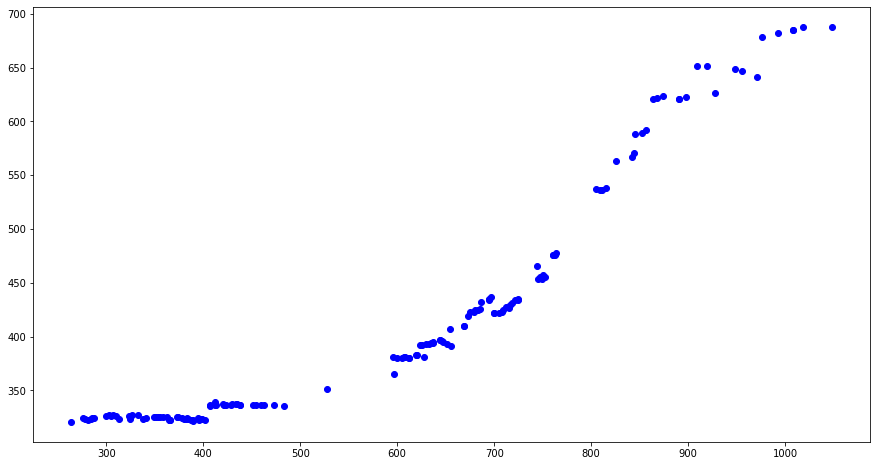

In [21]:
# just for fun, plot the bicycle path!

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
for xy in BICYCLE_MEASUREMENTS:
  if not isinstance(xy, str):
    ax.scatter(xy[0], xy[1], marker='o', color='b')

# Step 2 - Implement the Filter

Now, let's code the filter, you have total freedom here. Just make it work!

In [14]:
!pip install filterpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177 kB 5.2 MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110474 sha256=66cf638b8fa810fd6c273fb55eb68c1dcca36118cfc85062c77ba21095c118b8
  Stored in directory: /root/.cache/pip/wheels/ce/e0/ee/a2b3c5caab3418c1ccd8c4de573d4cbe13315d7e8b0a55fbc2
Successfully built filterpy


In [725]:
from filterpy.kalman import KalmanFilter
from scipy.linalg import block_diag
from filterpy.common import Q_discrete_white_noise
import numpy as np
import matplotlib.pyplot as plt


def TwoDimensionsKF(R_std, Q_std, dt, w, h):
    ''' creates and instantiates a filterpy 2D Kalman Filter object
        with a 2D constant acceleration model
        Inputs:
            R_Std (float) - measurement uncertainty
            Q_std (float) - Proccess noise covariance
            dt (float) - System Time Step
            w (int) - Frame Width
            h (int) - Frame Height
        Outputs:
            kf (filterpy object) 2D Kalman Filter object
    '''
    kf = KalmanFilter(dim_x=6, dim_z=2)
    kf.x = np.array([w//2, h//2, 0.1, 0.1, 0, 0]) # initial state (center of frame)
    kf.P = np.eye(6)*500 # np.max([w//2, h//2])
    q = Q_discrete_white_noise(dim=3, dt=dt, var=Q_std**2)
    kf.Q = block_diag(q, q) # Process noise covariance
    kf.R = np.eye(2) * R_std # measurement uncertainty/noise
    kf.H = np.array([[1, 0, 0, 0, 0, 0],  # measurement function
                     [0, 1, 0, 0, 0, 0]])
    kf.F = np.array([[1, 0, dt, 0, 0.5*dt*dt, 0],     # state transition matrix
                     [0, 1, 0,  dt, 0,        0.5*dt*dt],
                     [0, 0, 1,  0,  dt,       0],
                     [0, 0, 0,  1,  0,        dt],
                     [0, 0, 0,  0,  1,        0],
                     [0, 0, 0,  0,  0,        1]])

    return kf


In [726]:
# def TwoDimensionsKF(R_std, Q_std, dt, w, h):
#     ''' creates and instantiates a filterpy 2D Kalman Filter object
#         with a 2D constant velocity model
#         Inputs:
#             R_Std (float) - measurement uncertainty
#             Q_std (float) - Proccess noise covariance
#             dt (float) - System Time Step
#             w (int) - Frame Width
#             h (int) - Frame Height
#         Outputs:
#             kf (filterpy object) 2D Kalman Filter object
#     '''
#     kf = KalmanFilter(dim_x=4, dim_z=2)
#     kf.x = np.array([w//2, h//2, 1, 1]) # initial state (center of frame)
#     kf.P = np.eye(4)*100 # np.max([w//2, h//2])
#     q = Q_discrete_white_noise(dim=2, dt=dt, var=Q_std**2)
#     kf.Q = block_diag(q, q) # Process noise covariance
#     kf.R = np.eye(2) * R_std # measurement uncertainty/noise
#     kf.H = np.array([[1, 0, 0, 0],  # measurement function
#                      [0, 1, 0, 0]])
#     kf.F = np.array([[1, 0, dt, 0], # state transition matrix
#                      [0, 0, 1, 0],
#                      [0, 1, 0, dt],
#                      [0, 0, 0, 1]])
    
#     return kf


In [727]:
np.mean(np.diff(TIMESTAMPS))

1.6853513071934383

In [728]:
# BICYCLE_MEASUREMENTS
# TIMESTAMPS

R_std = 2.5 # measurement uncertainty
Q_std = 0.5 # process nosie
dt = np.mean(np.diff(TIMESTAMPS)) # time delta

# frame width and height
w, h = 1280, 720

# initialize Kalman Filter
kf = TwoDimensionsKF(R_std, Q_std, dt, w, h)

def main_pipeline(image):
    """
    Initialize a Kalman Filter, Run it, Make it converge!
    """
    h, w, _ = image.shape
    print(type(image))
    print(image.shape)
    print(STOP)
    return image

In [729]:
# try to use the Kalman Filter outside of the image
R_std = 5 # 5 # measurement uncertainty
Q_std = 1.5 # 1.5 # process noise
dt = np.mean(np.diff(TIMESTAMPS)) # time delta

# frame width and height
w, h = 1280, 720

# initialize Kalman Filter
kf = TwoDimensionsKF(R_std, Q_std, dt, w, h)

# store values in lists
updates = [] # estimates from measurement updates
preds = [] # estimates from predictions

# iterate through the measurements
for xy in BICYCLE_MEASUREMENTS:
    # Predict next state
    kf.predict()

    # update state with new measurement
    if not isinstance(xy, str):
       kf.update(xy)
       updates.append(kf.x)
    
    # else:
      # append prediction if measurment not taken
    preds.append(kf.x)
    


In [730]:
updates_arr = np.array(updates)
preds_arr = np.array(preds)
pos_updates = updates_arr[:, :2]
pos_preds = preds_arr[:, :2]

print(updates_arr.shape)
print(preds_arr.shape)

(152, 6)
(241, 6)


In [731]:
# !pip install ipympl

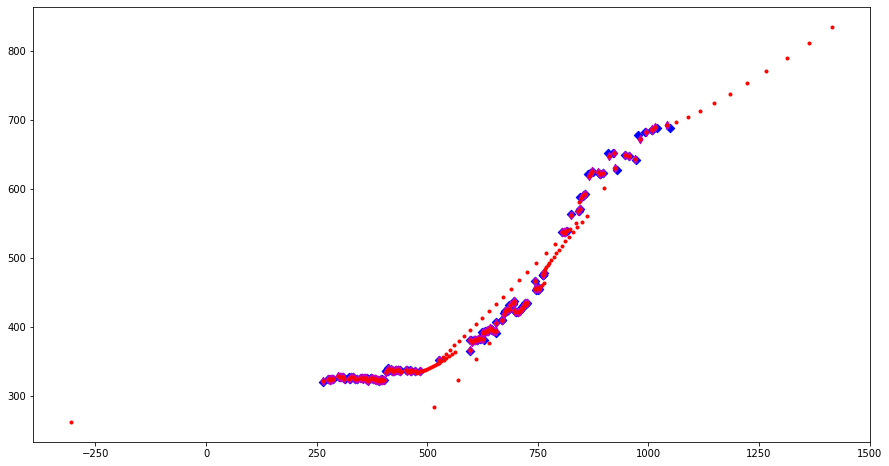

In [732]:
# %matplotlib widget
%matplotlib inline

fig = plt.figure(figsize=(15, 8))
for xy in BICYCLE_MEASUREMENTS:
  if not isinstance(xy, str):
    plt.scatter(xy[0], xy[1], marker='D', color='b')

plt.scatter(pos_updates[:, 0], pos_updates[:, 1], marker='d', color='m')
plt.scatter(pos_preds[:, 0], pos_preds[:, 1], marker='.', color='r')

In [708]:
measurements = []
for xy in BICYCLE_MEASUREMENTS:
  if not isinstance(xy, str):
    measurements.append(xy)

measurements_arr = np.array(measurements)

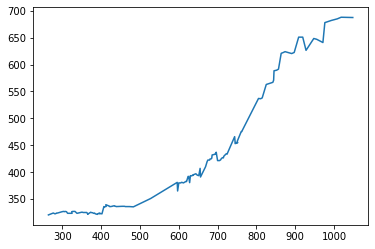

In [700]:
plt.plot(measurements_arr[:, 0], measurements_arr[:, 1])

In [701]:
pos_preds[:15, :]

array([[ 265.27563756,  320.62974709],
       [-301.66292954,  263.1169317 ],
       [ 276.03966204,  323.96320611],
       [ 282.55191259,  322.28652982],
       [ 283.20206302,  321.03785698],
       [ 285.98276983,  321.96552886],
       [ 286.71301908,  322.53058323],
       [ 288.56363381,  323.05149446],
       [ 298.66386455,  326.95380789],
       [ 303.62299061,  326.82446257],
       [ 306.24852892,  325.50664498],
       [ 308.72263442,  325.43074315],
       [ 311.76587015,  325.38830917],
       [ 314.048426  ,  323.11368775],
       [ 323.13859401,  324.80097516]])

In [702]:
BICYCLE_MEASUREMENTS[:15]

[[264.0, 320.5],
 'Not detected',
 [276.5, 324.0],
 [278.0, 323.5],
 [281.0, 322.5],
 [284.5, 323.5],
 [285.0, 324.0],
 [287.5, 324.0],
 [299.5, 326.5],
 [303.0, 327.0],
 [305.0, 326.5],
 [307.0, 327.0],
 [310.5, 326.5],
 [313.5, 323.5],
 [325.0, 323.5]]

In [703]:
np.round(kf.K)

array([[0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [584]:
# THIS CODE IS FOR VIDEO PROCESSING
# SEND AN IMAGE TO THE MAIN_PIPELINE FUNCTION, AND THE FUNCTION MUST RETURN AN IMAGE
from moviepy.editor import VideoFileClip
video_file = "/content/drive/My Drive/think_autonomous/kalman_filters_course/images/detect.mp4"
clip = VideoFileClip(video_file)
tracked_clip = clip.fl_image(main_pipeline)
# %time tracked_clip.write_videofile("/content/drive/My Drive/Think Autonomous/SDC Course/Kalman Filters/track.mp4",audio=False)

<class 'numpy.ndarray'>
(720, 1280, 3)


NameError: ignored